In [1]:
%matplotlib inline
import scipy.stats.mstats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cribbage.netbuilder import Model

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
from cribbage.game import compare_players
from cribbage.randomplayer import RandomCribbagePlayer
from cribbage.simpleplayer import SimpleCribbagePlayer

stats = compare_players([RandomCribbagePlayer(),
                         SimpleCribbagePlayer(estimate_playcard=False)],
                        500)
print 'Random player vs. simple AI player (only discard, with random plays):', stats
print float(stats[1]) / sum(stats)

Random player vs. simple AI player (only discard, with random plays): [17, 483]
0.966


2017-02-05 12:48:23,369 INFO: weights loaded from snapshot 0002255999.npz
2017-02-05 12:48:23,461 INFO: weights loaded from snapshot 0001001999.npz
2017-02-05 12:48:23,546 INFO: weights loaded from snapshot 0001439999.npz
2017-02-05 12:48:23,656 INFO: weights loaded from snapshot 0003119999.npz


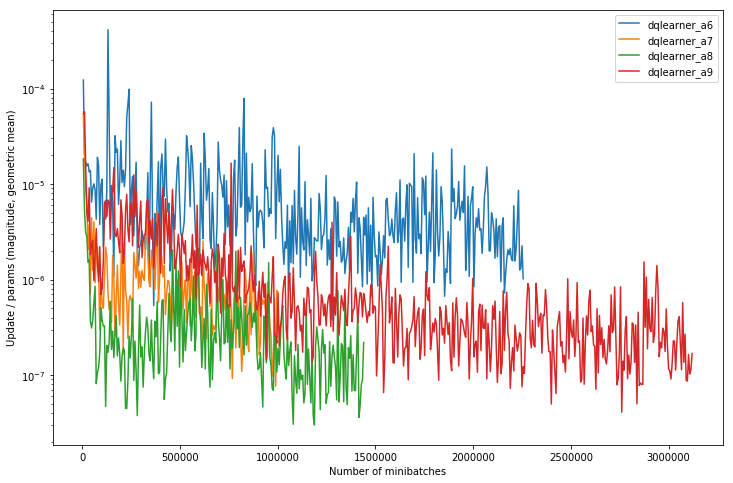

In [3]:
plt.clf()
plt.figure(figsize=(12, 8))
plt.semilogy()
for x in [6,7,8,9]:
    model = Model('models', 'dqlearner_a{}'.format(x))

    df=pd.DataFrame(model.metadata['snapshots'])
    df['pm_mean'] = scipy.stats.mstats.gmean(np.array([x for x in df['param_mags']]), axis=1)
    df['um_mean'] = scipy.stats.mstats.gmean(np.array([x for x in df['update_mags']]), axis=1)
    #df['pm_mean'] = np.array([x for x in df['param_mags']]).mean(axis=1)
    #df['um_mean'] = np.array([x for x in df['update_mags']]).mean(axis=1)
    df['umm_by_pmm'] = df['um_mean'] / df['pm_mean']

    plt.plot(df['num_minibatches'], df['umm_by_pmm'], label=model.model_name)

plt.xlabel('Number of minibatches')
plt.ylabel('Update / params (magnitude, geometric mean)')
plt.legend()

In [4]:
def plot_training(model_name='dqlearner_a5'):
    '''Wrap code to plot the training and validation error of a given model.'''
    model = Model('models', model_name)
    plt.clf()
    #plt.figure()
    data = [[ss['num_minibatches'], ss['train_err'], ss['validation_err']] for ss in
            model.metadata['snapshots']]
    data = np.array(data).T
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax1.plot(data[0], data[1], label='Training Error', color='C0')
    ax2 = plt.twinx()
    ax2.plot(data[0], data[2], label='Validation Error', color='C1')
    ax1.set_xlabel('Number of minibatches')
    ax1.set_ylabel('Mean squared training error per minibatch')
    ax1.tick_params('y', colors='C0')
    ax2.set_ylabel('Validation error per minibatch')
    ax2.tick_params('y', colors='C1')
    #fig.legend()
    plt.title(model.model_name)
    fig.tight_layout()
    fig.show()

2017-02-05 12:48:24,934 INFO: weights loaded from snapshot 0001565999.npz
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


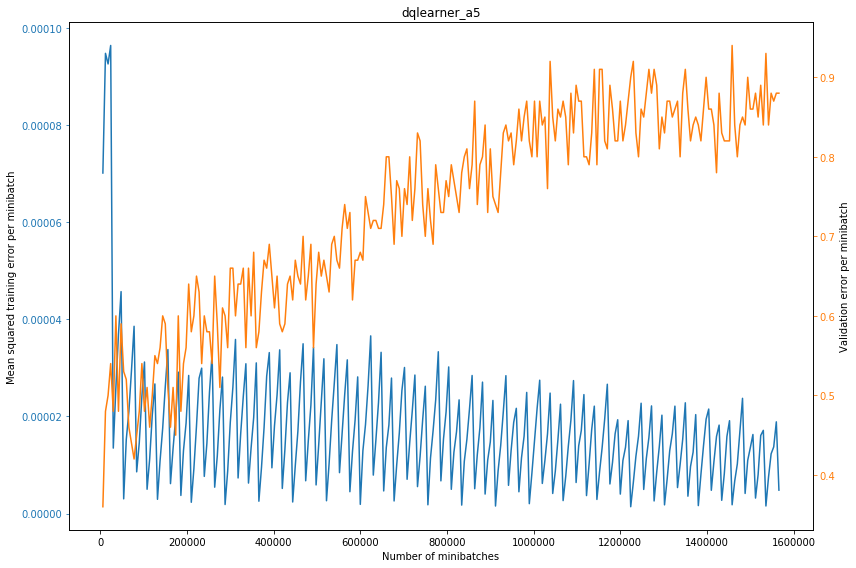

In [5]:
plot_training('dqlearner_a5')

2017-02-05 12:48:25,524 INFO: weights loaded from snapshot 0002255999.npz


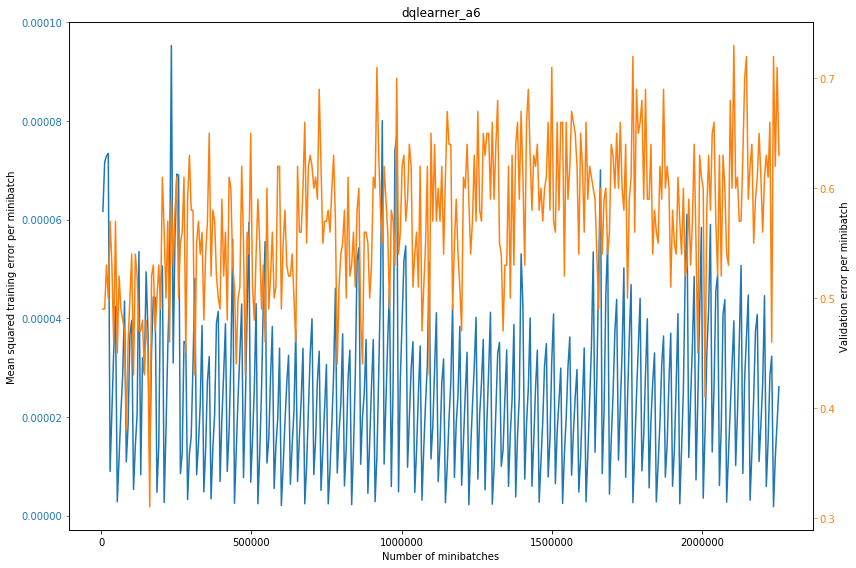

In [6]:
plot_training('dqlearner_a6')

2017-02-05 12:48:26,115 INFO: weights loaded from snapshot 0001001999.npz


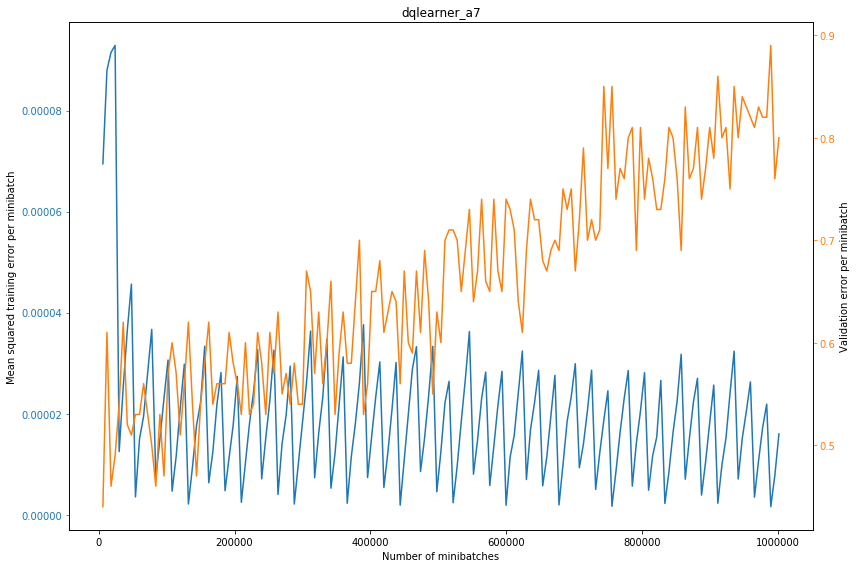

In [7]:
plot_training('dqlearner_a7')

2017-02-05 12:48:26,611 INFO: weights loaded from snapshot 0001439999.npz


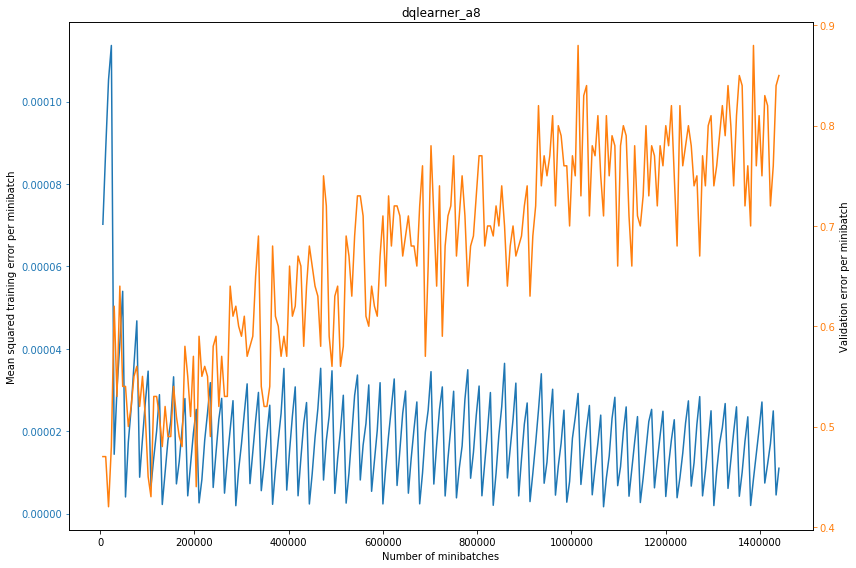

In [8]:
plot_training('dqlearner_a8')

2017-02-05 12:48:27,106 INFO: weights loaded from snapshot 0003119999.npz


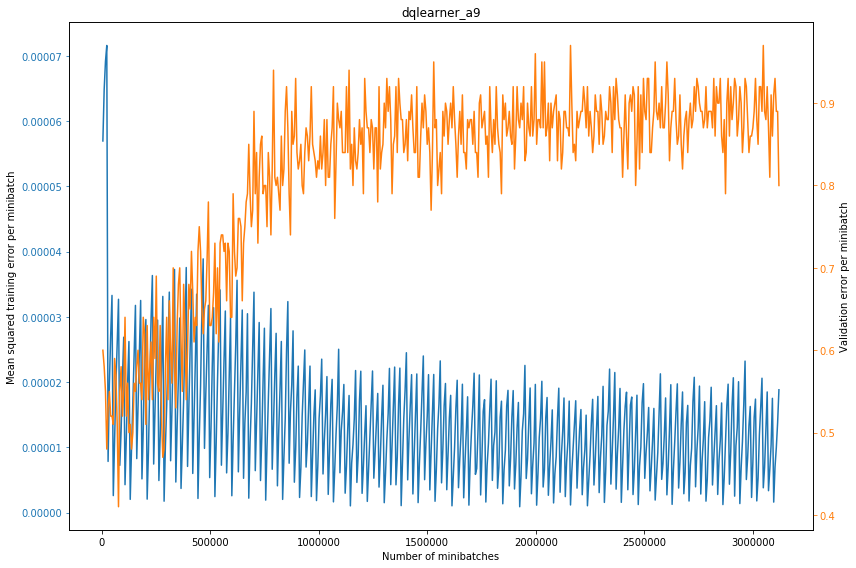

In [9]:
plot_training('dqlearner_a9')

In [10]:
model = Model('models', 'dqlearner_a9')

2017-02-05 12:48:27,646 INFO: weights loaded from snapshot 0003119999.npz


In [18]:
from cribbage.expt import QLearningPlayer, get_discard_scaling
from cribbage.netbuilder import make_input_scaler
ss = model.load_snapshot('max_validation')
ss.input_scaler(make_input_scaler(*get_discard_scaling()))
player = QLearningPlayer(ss, None, 0.05)
stats = compare_players([RandomCribbagePlayer(),
                         player],
                        500)
print 'Random player vs. RL player (only discard, with random plays):', stats
print float(stats[1]) / sum(stats)

Random player vs. RL player (only discard, with random plays): [53, 447]
0.894


In [19]:
stats = compare_players([SimpleCribbagePlayer(estimate_playcard=False),
                         player],
                        500)
print 'Simple AI player vs. RL player (only discard, with random plays):', stats
print float(stats[1]) / sum(stats)

Simple AI player vs. RL player (only discard, with random plays): [343, 157]
0.314
